# Изучение тарифов оператора сотовой связи Мегалайн.

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
<br>
<br>**Описание тарифов**
<br>**Тариф «Смарт»**
<br>Ежемесячная плата: **550 рублей**
<br>Включено **500 минут разговора, 50 сообщений и 15 Гб интернет-трафика**
<br>Стоимость услуг **сверх тарифного пакета:**
<br>минута разговора: **3 рубля**
<br>сообщение: **3 рубля**
<br>1 Гб интернет-трафика: **200 рублей**
<br>
<br>**Тариф «Ультра»**
<br>Ежемесячная плата: **1950 рублей**
<br>Включено **3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика**
<br>Стоимость услуг **сверх тарифного пакета:**
<br>минута разговора: **1 рубль**
<br>сообщение: **1 рубль**
<br>1 Гб интернет-трафика: **150 рублей**
<br>
<br>**Примечание:**
<br>«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он <br>длился всего 1 секунду, будет засчитан как 1 минута.
<br>Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если <br>абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<br>Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. Для изучения данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

##  Изучение данных из файла

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Открываем файлы с данными.

In [2]:
users = pd.read_csv('/datasets/users.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
calls = pd.read_csv('/datasets/calls.csv')

In [3]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
internet.info()
internet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages.info()
messages.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
tariffs.info()
tariffs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
calls.info()
calls.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


## Предобработка данных

### Приведение данных к верному типу users

Названия столбцов в датасете указаны верно. 

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Ошибки в типах идут по столбцам с датами. Вместо формата datetime идет object. Исправляем.

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Замена прошла успешно.

### Приведение данных к верному типу internet

Названия столбцов в датасете указаны верно. 

In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Ошибка в типе идет по столбцу с датами session_date. Вместо формата datetime идет object. Исправляем.

In [11]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


### Приведение данных к верному типу messages

Названия столбцов в датасете указаны верно. 

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Ошибка в типе идет по столбцу message_date с датой. Вместо формата datetime идет object. Исправляем.

In [13]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Приведение данных к верному типу tariffs

Названия столбцов в датасете указаны верно. 

In [14]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Кажется, что все форматы верные.

### Приведение данных к верному типу calls

Названия столбцов в датасете указаны верно. 

In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Аналогично, меняем формат даты.

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


 ###  Ошибки в данных(дубликаты, пропуски)

Проверим датасеты на дубликаты.

In [17]:
df=[users, internet, messages, tariffs, calls]
for d in df:
    print(d.duplicated().sum())

0
0
0
0
0


Дубликатов нет. Проверим пропущенные значения методом isna.

In [18]:
df=[users, internet, messages, tariffs, calls]
for d in df:
    print(d.isna().sum())
    print()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

id           0
call_date    0
duration     0
user_id      0
dtype: int64



Получается, что пропущенные значения есть только в датасете users в столбце churn_date. Это столбец с датой прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Оставим в таком виде.

Посмотрим на значения в столбцах датасетов методом describe. В messages и tariffs нет интересных числянных данных.

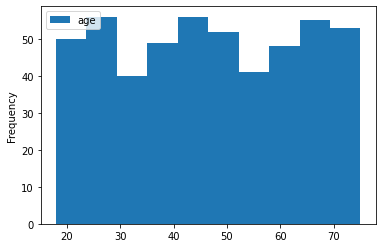

In [19]:
users.plot(x='user_id', y='age', kind='hist')
plt.show()

Возраст клиентов от 1 до 75 лет. Все логично.

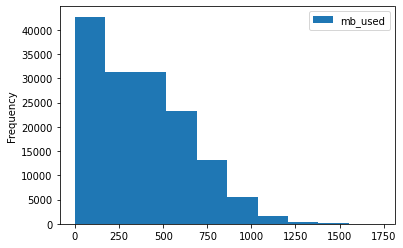

In [20]:
internet.plot(x='user_id', y='mb_used', kind='hist')
plt.show()

Кол-во использованных мбайт за сессию от 0 до 1750. Старнных значений по гистограмме не наблюдается.

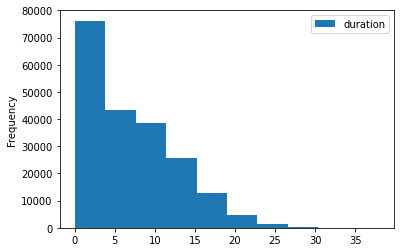

In [21]:
calls.plot(x='user_id', y='duration', kind='hist')
plt.show()

Время разговора от 0 до 30 мин. По гистограмме и по describe нет очевидных выбросов. 

Каких то отрицательных или совсем странных значений нет. Кажется,что все в норме.

## Расчёты 

### Расчет количества звонков и минут по месяцам

Будем работать с таблицей calls (информация о звонках):
<br>id — уникальный номер звонка
<br>call_date — дата звонка
<br>duration — длительность звонка в минутах
<br>user_id — идентификатор пользователя, сделавшего звонок

In [23]:
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Нужно округлить до минуты каждый звонок по правилам тарифа Мегалайн.

In [24]:
calls['duration'] = np.ceil(calls['duration'])
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Так как нам нужна группировка по месяцам, необходимо создать столбец с месяцем разговора.

In [25]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Сформируем сводную таблицу по пользователям с группировкой по месяцам. Названия столбцов будут двойными - переименуем их корректно.

In [26]:
data_pivot_calls = calls.pivot_table(index=['user_id','month'],values=['duration'], aggfunc=['count','sum'])
data_pivot_calls.columns = ['count_calls','sum_duration']
data_pivot_calls.head(5)

count_calls  sum_duration
user_id month                           
1000    5               22         159.0
        6               43         172.0
        7               47         340.0
        8               52         408.0
        9               58         466.0

### Расчет количества отправленных сообщений по месяцам

Будем работать с таблицей messages (информация о сообщениях):
<br>id — уникальный номер сообщения
<br>message_date — дата сообщения
<br>user_id — идентификатор пользователя, отправившего сообщение 

In [27]:
messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Так как нам нужна группировка по месяцам, необходимо создать столбец с месяцем отправки смс.

In [28]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Сформируем сводную таблицу по пользователям с группировкой по месяцам. Название столбца будет двойным - переименуем его корректно.

In [29]:
data_pivot_messages = messages.pivot_table(index=['user_id','month'],values=['id'],aggfunc=['count'])
data_pivot_messages.columns = ['count_sms']
data_pivot_messages.head(5)

count_sms
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57

### Расчет объема израсходованного интернет-трафика по месяцам

Будем работать с таблицей internet (информация об интернет-сессиях):
<br>id — уникальный номер сессии
<br>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<br>session_date — дата интернет-сессии
<br>user_id — идентификатор пользователя

In [30]:
internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Так как нам нужна группировка по месяцам, необходимо создать столбец с месяцем отправки смс.

In [31]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Сформируем сводную таблицу по пользователям с группировкой по месяцам. Название столбца будет двойным - переименуем его корректно.

In [32]:
data_pivot_internet = internet.pivot_table(index=['user_id','month'],values=['mb_used'], aggfunc=['sum'])
data_pivot_internet.columns = ['sum_mb_used']
data_pivot_internet.head(5)

sum_mb_used
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91

### Расчет помесячной выручки с каждого пользователя

 (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Объединим данные таблиц в одну сводную по клиентам. По этапно. 1) Calls + massages 2) + Internet.

In [33]:
data_pivot_c_m = data_pivot_calls.join(data_pivot_messages, on=['user_id', 'month'], how='outer')
data_pivot_total = data_pivot_internet.join(data_pivot_c_m, on=['user_id', 'month'], how='outer')
data_pivot_total.head(5)
data_pivot_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1446, 8)
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sum_mb_used   3203 non-null   float64
 1   count_calls   3174 non-null   float64
 2   sum_duration  3174 non-null   float64
 3   count_sms     2717 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


Из таблицы users сделаем сводную по тарифам и добавим данные в общую своднуую data_pivot_total.

In [34]:
users = users[['user_id','tariff','city']]
users.head(5)

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк


In [35]:
data_pivot_total = pd.merge(users, data_pivot_total, on='user_id', how='left')
data_pivot_total 

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms
0,1000,ultra,Краснодар,2253.49,22.0,159.0,22.0
1,1000,ultra,Краснодар,23233.77,43.0,172.0,60.0
2,1000,ultra,Краснодар,14003.64,47.0,340.0,75.0
3,1000,ultra,Краснодар,14055.93,52.0,408.0,81.0
4,1000,ultra,Краснодар,14568.91,58.0,466.0,57.0
...,...,...,...,...,...,...,...
3211,1498,smart,Владикавказ,20579.36,41.0,247.0,42.0
3212,1499,smart,Пермь,1845.75,9.0,70.0,11.0
3213,1499,smart,Пермь,17788.51,68.0,449.0,48.0
3214,1499,smart,Пермь,17963.31,74.0,612.0,59.0


Проверим пропуски в полученной сводной таблице.

In [36]:
data_pivot_total.isna().sum()

user_id           0
tariff            0
city              0
sum_mb_used      13
count_calls      42
sum_duration     42
count_sms       499
dtype: int64

Пропуски есть. Возникли при объединении. Значения в соответствующие периоды не было. Значит, нужно заполнить их нулями, не пользовались услугами. Так и сделаем.

In [37]:
data_pivot_total = data_pivot_total.fillna(0)
data_pivot_total.isna().sum()

user_id         0
tariff          0
city            0
sum_mb_used     0
count_calls     0
sum_duration    0
count_sms       0
dtype: int64

Создадим отдельную таблицы по тарифам ultra и smart.

In [38]:
data_pivot_total_ultra = data_pivot_total.query('tariff == "ultra"')
data_pivot_total_ultra['tariff'].value_counts()    

ultra    986
Name: tariff, dtype: int64

In [39]:
data_pivot_total_smart = data_pivot_total.query('tariff == "smart"')
data_pivot_total_smart['tariff'].value_counts()    

smart    2230
Name: tariff, dtype: int64

Выведем условия тарифов.

In [40]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Создадим функции с определением кол-ва экстра смс, интернета и звонков. Заполним значения столбцов экстра услугами. 

In [41]:
data_pivot_total_ultra

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms
0,1000,ultra,Краснодар,2253.49,22.0,159.0,22.0
1,1000,ultra,Краснодар,23233.77,43.0,172.0,60.0
2,1000,ultra,Краснодар,14003.64,47.0,340.0,75.0
3,1000,ultra,Краснодар,14055.93,52.0,408.0,81.0
4,1000,ultra,Краснодар,14568.91,58.0,466.0,57.0
...,...,...,...,...,...,...,...
3188,1495,ultra,Иркутск,2614.07,17.0,92.0,13.0
3189,1495,ultra,Иркутск,33067.62,112.0,813.0,82.0
3190,1495,ultra,Иркутск,29363.00,152.0,1030.0,82.0
3191,1495,ultra,Иркутск,38939.11,129.0,954.0,79.0


In [42]:
def mb(data): 
    if data['sum_mb_used'] < 30720 :
        return 0
    else:
        return (data['sum_mb_used'] - 30720)
def sms(data): 
    if data['count_sms'] < 1000 :
        return 0
    else:
        return (data['count_sms'] - 1000)
def call_duration(data): 
    if data['sum_duration'] < 3000 :
        return 0
    else:
        return (data['sum_duration'] - 3000)

data_pivot_total_ultra['extra_mb'] = data_pivot_total_ultra.apply(mb, axis=1) 
data_pivot_total_ultra['extra_sms'] = data_pivot_total_ultra.apply(sms, axis=1) 
data_pivot_total_ultra['extra_calls'] = data_pivot_total_ultra.apply(call_duration, axis=1) 
data_pivot_total_ultra

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls
0,1000,ultra,Краснодар,2253.49,22.0,159.0,22.0,0.00,0,0
1,1000,ultra,Краснодар,23233.77,43.0,172.0,60.0,0.00,0,0
2,1000,ultra,Краснодар,14003.64,47.0,340.0,75.0,0.00,0,0
3,1000,ultra,Краснодар,14055.93,52.0,408.0,81.0,0.00,0,0
4,1000,ultra,Краснодар,14568.91,58.0,466.0,57.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
3188,1495,ultra,Иркутск,2614.07,17.0,92.0,13.0,0.00,0,0
3189,1495,ultra,Иркутск,33067.62,112.0,813.0,82.0,2347.62,0,0
3190,1495,ultra,Иркутск,29363.00,152.0,1030.0,82.0,0.00,0,0
3191,1495,ultra,Иркутск,38939.11,129.0,954.0,79.0,8219.11,0,0


Мы знаем условия округления: «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
<br> Данные по длительности у нас в минутах. Тут все ок.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
<br> А вот мегабайты нужно округлять. Проведем округление.

In [43]:
data_pivot_total_ultra['extra_gb'] = np.ceil(data_pivot_total_ultra['extra_mb']/1024)
data_pivot_total_ultra

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb
0,1000,ultra,Краснодар,2253.49,22.0,159.0,22.0,0.00,0,0,0.0
1,1000,ultra,Краснодар,23233.77,43.0,172.0,60.0,0.00,0,0,0.0
2,1000,ultra,Краснодар,14003.64,47.0,340.0,75.0,0.00,0,0,0.0
3,1000,ultra,Краснодар,14055.93,52.0,408.0,81.0,0.00,0,0,0.0
4,1000,ultra,Краснодар,14568.91,58.0,466.0,57.0,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3188,1495,ultra,Иркутск,2614.07,17.0,92.0,13.0,0.00,0,0,0.0
3189,1495,ultra,Иркутск,33067.62,112.0,813.0,82.0,2347.62,0,0,3.0
3190,1495,ultra,Иркутск,29363.00,152.0,1030.0,82.0,0.00,0,0,0.0
3191,1495,ultra,Иркутск,38939.11,129.0,954.0,79.0,8219.11,0,0,9.0


Вычислим помесячную выручку с каждого пользователя.

In [44]:
def total(data): 
    return (1950+150*data['extra_gb']+1*data['extra_sms']+1*data['extra_calls'])   
data_pivot_total_ultra['profit'] = data_pivot_total_ultra.apply(total, axis=1) 
data_pivot_total_ultra

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb,profit
0,1000,ultra,Краснодар,2253.49,22.0,159.0,22.0,0.00,0,0,0.0,1950.0
1,1000,ultra,Краснодар,23233.77,43.0,172.0,60.0,0.00,0,0,0.0,1950.0
2,1000,ultra,Краснодар,14003.64,47.0,340.0,75.0,0.00,0,0,0.0,1950.0
3,1000,ultra,Краснодар,14055.93,52.0,408.0,81.0,0.00,0,0,0.0,1950.0
4,1000,ultra,Краснодар,14568.91,58.0,466.0,57.0,0.00,0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3188,1495,ultra,Иркутск,2614.07,17.0,92.0,13.0,0.00,0,0,0.0,1950.0
3189,1495,ultra,Иркутск,33067.62,112.0,813.0,82.0,2347.62,0,0,3.0,2400.0
3190,1495,ultra,Иркутск,29363.00,152.0,1030.0,82.0,0.00,0,0,0.0,1950.0
3191,1495,ultra,Иркутск,38939.11,129.0,954.0,79.0,8219.11,0,0,9.0,3300.0


помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Перейдем к тарифу smart.

In [45]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [46]:
def mb(data): 
    if data['sum_mb_used'] < 15360 :
        return 0
    else:
        return (data['sum_mb_used'] - 15360)
def sms(data): 
    if data['count_sms'] < 50 :
        return 0
    else:
        return (data['count_sms'] - 50)
def call_duration(data): 
    if data['sum_duration'] < 500 :
        return 0
    else:
        return (data['sum_duration'] - 500)

data_pivot_total_smart['extra_mb'] = data_pivot_total_smart.apply(mb, axis=1) 
data_pivot_total_smart['extra_sms'] = data_pivot_total_smart.apply(sms, axis=1) 
data_pivot_total_smart['extra_calls'] = data_pivot_total_smart.apply(call_duration, axis=1) 
data_pivot_total_smart

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls
8,1001,smart,Москва,18429.34,59.0,430.0,0.0,3069.34,0.0,0.0
9,1001,smart,Москва,14036.66,63.0,414.0,0.0,0.00,0.0,0.0
10,1002,smart,Стерлитамак,10856.82,15.0,117.0,4.0,0.00,0.0,0.0
11,1002,smart,Стерлитамак,17580.10,26.0,214.0,11.0,2220.10,0.0,0.0
12,1002,smart,Стерлитамак,20319.26,42.0,289.0,13.0,4959.26,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3211,1498,smart,Владикавказ,20579.36,41.0,247.0,42.0,5219.36,0.0,0.0
3212,1499,smart,Пермь,1845.75,9.0,70.0,11.0,0.00,0.0,0.0
3213,1499,smart,Пермь,17788.51,68.0,449.0,48.0,2428.51,0.0,0.0
3214,1499,smart,Пермь,17963.31,74.0,612.0,59.0,2603.31,9.0,112.0


Округлим трафик.

In [47]:
data_pivot_total_smart['extra_gb'] = np.ceil(data_pivot_total_smart['extra_mb']/1024)
data_pivot_total_smart

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb
8,1001,smart,Москва,18429.34,59.0,430.0,0.0,3069.34,0.0,0.0,3.0
9,1001,smart,Москва,14036.66,63.0,414.0,0.0,0.00,0.0,0.0,0.0
10,1002,smart,Стерлитамак,10856.82,15.0,117.0,4.0,0.00,0.0,0.0,0.0
11,1002,smart,Стерлитамак,17580.10,26.0,214.0,11.0,2220.10,0.0,0.0,3.0
12,1002,smart,Стерлитамак,20319.26,42.0,289.0,13.0,4959.26,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,smart,Владикавказ,20579.36,41.0,247.0,42.0,5219.36,0.0,0.0,6.0
3212,1499,smart,Пермь,1845.75,9.0,70.0,11.0,0.00,0.0,0.0,0.0
3213,1499,smart,Пермь,17788.51,68.0,449.0,48.0,2428.51,0.0,0.0,3.0
3214,1499,smart,Пермь,17963.31,74.0,612.0,59.0,2603.31,9.0,112.0,3.0


Вычислим помесячную выручку с каждого пользователя.

In [48]:
def total(data): 
    return (550+200*data['extra_gb']+3*data['extra_sms']+3*data['extra_calls'])   
data_pivot_total_smart['profit'] = data_pivot_total_smart.apply(total, axis=1) 
data_pivot_total_smart

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb,profit
8,1001,smart,Москва,18429.34,59.0,430.0,0.0,3069.34,0.0,0.0,3.0,1150.0
9,1001,smart,Москва,14036.66,63.0,414.0,0.0,0.00,0.0,0.0,0.0,550.0
10,1002,smart,Стерлитамак,10856.82,15.0,117.0,4.0,0.00,0.0,0.0,0.0,550.0
11,1002,smart,Стерлитамак,17580.10,26.0,214.0,11.0,2220.10,0.0,0.0,3.0,1150.0
12,1002,smart,Стерлитамак,20319.26,42.0,289.0,13.0,4959.26,0.0,0.0,5.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,smart,Владикавказ,20579.36,41.0,247.0,42.0,5219.36,0.0,0.0,6.0,1750.0
3212,1499,smart,Пермь,1845.75,9.0,70.0,11.0,0.00,0.0,0.0,0.0,550.0
3213,1499,smart,Пермь,17788.51,68.0,449.0,48.0,2428.51,0.0,0.0,3.0,1150.0
3214,1499,smart,Пермь,17963.31,74.0,612.0,59.0,2603.31,9.0,112.0,3.0,1513.0


Посмотрим на выручки т клиентов разных тарифов.

In [49]:
data_pivot_total_smart['profit'].describe()

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: profit, dtype: float64

In [50]:
data_pivot_total_ultra['profit'].describe()

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: profit, dtype: float64

**Вывод**
<br> Кол-во пользователей тарифа Smart значительно больше. 2225 клиентов против 957. В среднем пользователи Smart платят 1161 руб, против 2072 у пользователей Ultra. Если сравнивать по макимуму, он также относится к тарифу Ultra.А медианы оплат отличаются более чем в 2 раза. 950 руб у тарифа Smart, против 1950 у тарифа Ultra. 
<br> Получается, что "Мегалайн" значительно больше зарабатывает на пользователях тариффа Ultra.

## Исследовательский анализ данных

### Пользователи тарифа Smart

Будем работать с данными тарифа Smart.

In [51]:
data_pivot_total_smart.head(5)

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb,profit
8,1001,smart,Москва,18429.34,59.0,430.0,0.0,3069.34,0.0,0.0,3.0,1150.0
9,1001,smart,Москва,14036.66,63.0,414.0,0.0,0.00,0.0,0.0,0.0,550.0
10,1002,smart,Стерлитамак,10856.82,15.0,117.0,4.0,0.00,0.0,0.0,0.0,550.0
11,1002,smart,Стерлитамак,17580.10,26.0,214.0,11.0,2220.10,0.0,0.0,3.0,1150.0
12,1002,smart,Стерлитамак,20319.26,42.0,289.0,13.0,4959.26,0.0,0.0,5.0,1550.0


Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа **Smart** в месяц.
<br>Изучаем следующие параметры: минуты разговора(sum_duration), сообщения(count_sms), и объем трафика (sum_mb_used) требуется пользователям тарифа Smart. Построим гистограммы для каждого параметра.Посчитаем среднее количество, дисперсию и стандартное отклонение. Данные занесем в отдельный DataFrame df_smart.

In [52]:
df_smart=[]
parameters = ['sum_duration', 'count_sms', 'sum_mb_used']
df_smart = pd.DataFrame(data=df_smart, index=parameters, columns=['mean_smart','variance_smart','sd_smart'], dtype=None)
mean = []
for parameter in parameters:     
    mean.append(round(data_pivot_total_smart[parameter].mean()))
df_smart['mean_smart'] = mean
variance = []
for parameter in parameters:     
    variance.append(round(data_pivot_total_smart.var()[parameter]))
df_smart['variance_smart'] = variance
sd = []
for parameter in parameters:     
    sd.append(round(math.sqrt(data_pivot_total_smart[parameter].var())))
df_smart['sd_smart'] = sd
df_smart

,mean_smart,variance_smart,sd_smart
sum_duration,418,36281,190
count_sms,33,797,28
sum_mb_used,16201,34564843,5879


Построим гистограммы параметров: минуты разговора(sum_duration), сообщения(count_sms), и объем трафика (sum_mb_used) пользователей тарифа Smart. 
<br> Посмотрим, коррелируют ли между собой длительность разговоров, число смс и интернет-травик.

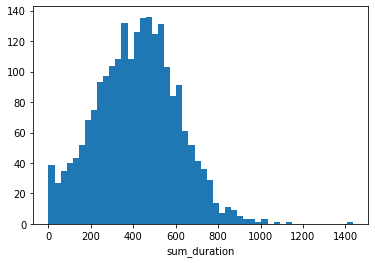

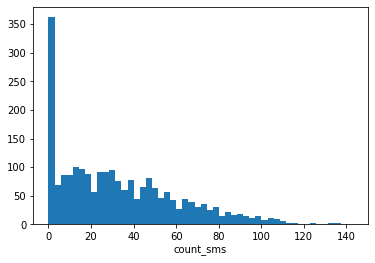

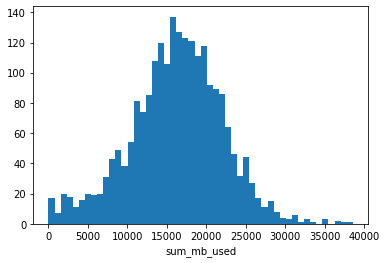

,sum_duration,count_sms,sum_mb_used
sum_duration,1.000000,0.203971,0.342283
count_sms,0.203971,1.000000,0.147665
sum_mb_used,0.342283,0.147665,1.000000


In [54]:
data_smart_stat = data_pivot_total_smart[['sum_duration', 'count_sms', 'sum_mb_used']]
parameters = ['sum_duration', 'count_sms', 'sum_mb_used']
for parameter in parameters:
    plt.hist(data_smart_stat[parameter], bins = 50)
    plt.xlabel(parameter)
    plt.show()
data_smart_stat.corr()

Корреляции между параметрами не обнаружено. Кооэффициент значительно ближе к 0, чем к 1.

Посмотрим на матрицу рассеяния. 

array([[<AxesSubplot:xlabel='sum_duration', ylabel='sum_duration'>,
        <AxesSubplot:xlabel='count_sms', ylabel='sum_duration'>,
        <AxesSubplot:xlabel='sum_mb_used', ylabel='sum_duration'>],
       [<AxesSubplot:xlabel='sum_duration', ylabel='count_sms'>,
        <AxesSubplot:xlabel='count_sms', ylabel='count_sms'>,
        <AxesSubplot:xlabel='sum_mb_used', ylabel='count_sms'>],
       [<AxesSubplot:xlabel='sum_duration', ylabel='sum_mb_used'>,
        <AxesSubplot:xlabel='count_sms', ylabel='sum_mb_used'>,
        <AxesSubplot:xlabel='sum_mb_used', ylabel='sum_mb_used'>]],
      dtype=object)

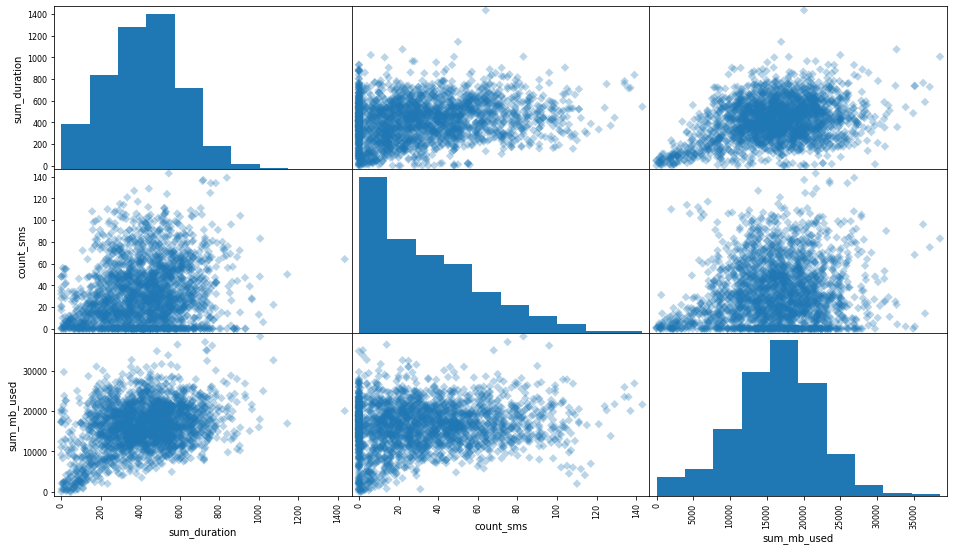

In [55]:
pd.plotting.scatter_matrix(data_smart_stat, figsize=(16, 9),alpha=0.3, marker="D") 

Посмотрим на выбросы в начениях по boxplot-ам.

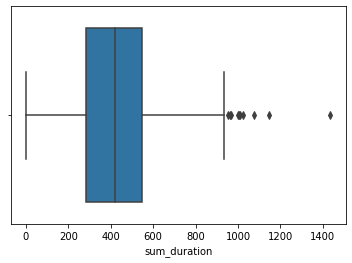

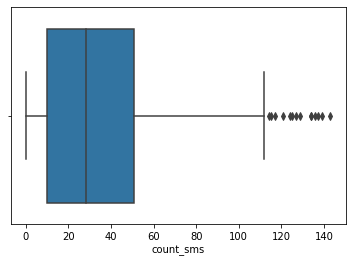

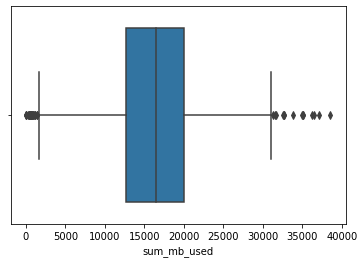

In [56]:
param = ['sum_duration', 'count_sms', 'sum_mb_used']
for par in param:
    ax = sns.boxplot(x=data_smart_stat[par])
    plt.show()

Выбросы есть во всех значениях sum_duration, count_sms и sum_mb_used. Устраним выбросы по всем столбцам пользуяюсь правилом, что выбросы находятся вне интервала (Q1-1,5*IQR:Q3+1.5*IQR).

,sum_duration,count_sms,sum_mb_used
sum_duration,1.000000,0.203971,0.342283
count_sms,0.203971,1.000000,0.147665
sum_mb_used,0.342283,0.147665,1.000000


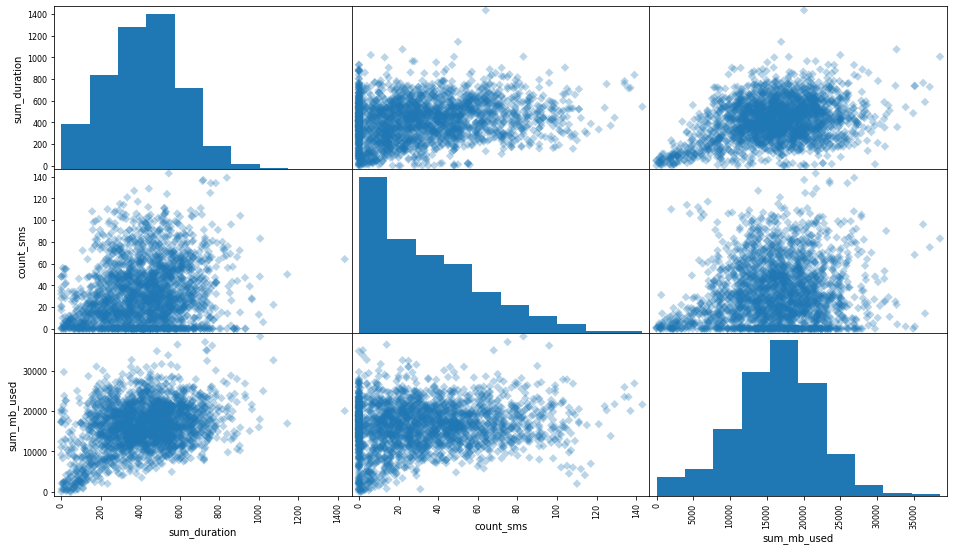

In [57]:
param = ['sum_duration', 'count_sms', 'sum_mb_used']
for par in param:
    Q1 = data_smart_stat[par].quantile(0.25)
    Q3 = data_smart_stat[par].quantile(0.75)
    IQR = Q3 - Q1
    data_smart_stat = data_smart_stat.loc[((data_smart_stat[par]>=(Q1-1.5*IQR)) 
                                                       | (data_smart_stat[par]<=(Q3+1.5*IQR)))]
    
pd.plotting.scatter_matrix(data_smart_stat, figsize=(16, 9),alpha=0.3, marker="D") 
df_stat = data_smart_stat[['sum_duration', 'count_sms', 'sum_mb_used']]
df_stat.corr()

**Выводы по распределениям параметров в тарифе Smart:**
<br> **Распределение длительности звонков** близко к нормальному с небольшим смещением. Большая часть значени лежит в интервале 300-550 мин. Среднне 395 мин. При этом стандартное отклонение 179 мин. При этом включены в тариф 500 мин.
<br>**Распределение отправленных сообщений** имеет большой пик в интервале до 10 смс.Около 530 пользователей отправляют такое кол-в сообщений. Согласно вычислениям, 33 сообщения - это среднее кол-во для тарифа Smart. Стандартное отклонение при этом составляет 28 сообщений. При этом включены в тариф 50 смс.
<br>**Распределение интернет трафика** стремится к нормальному. Пиковые значения лежат в интервале 13-22 Гб.Среднее около 16 Гб, стандартное отклонение 5894 Мб(около 6 Гб). При этом включены в тариф 15 Гб интернет-трафика.

### Пользователи тарифа Ultra

Аналогично посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа **Ultra** в месяц.
<br>Изучаем следующие параметры: минуты разговора(sum_duration), сообщения(count_sms), и объем трафика (sum_mb_used) требуется пользователям тарифа Smart. Построим гистограммы для каждого параметра.Посчитаем среднее количество, дисперсию и стандартное отклонение. Данные занесем в отдельный DataFrame df_ultra.

In [58]:
df_ultra = []
parameters = ['sum_duration', 'count_sms', 'sum_mb_used']
df_ultra = pd.DataFrame(data=df_ultra, index=parameters, columns=['mean_ultra','variance_ultra','sd_ultra'], dtype=None)
mean = []
for parameter in parameters:     
    mean.append(round(data_pivot_total_ultra[parameter].mean()))
df_ultra['mean_ultra'] = mean
variance = []
for parameter in parameters:     
    variance.append(round(data_pivot_total_ultra.var()[parameter]))
df_ultra['variance_ultra'] = variance
sd = []
for parameter in parameters:     
    sd.append(round(math.sqrt(data_pivot_total_ultra[parameter].var())))
df_ultra['sd_ultra'] = sd
df_ultra

,mean_ultra,variance_ultra,sd_ultra
sum_duration,526,101052,318
count_sms,49,2285,48
sum_mb_used,19449,102032129,10101


Построим гистограммы параметров: минуты разговора(sum_duration), сообщения(count_sms), и объем трафика (sum_mb_used) пользователей тарифа Ultra.

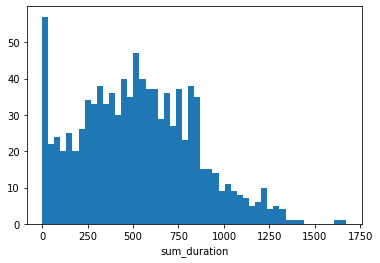

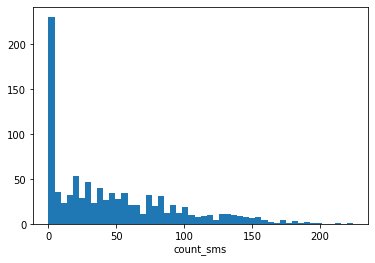

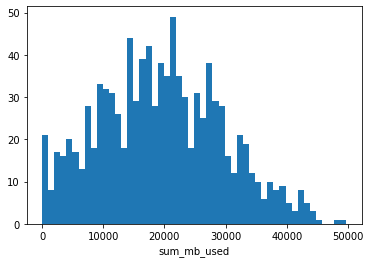

In [59]:
parameters = ['sum_duration', 'count_sms', 'sum_mb_used']
for parameter in parameters:
    plt.hist(data_pivot_total_ultra[parameter], bins=50)
    plt.xlabel(parameter)
    plt.show()

Посмотрим, коррелируют ли между собой длительность разговоров, число смс и интернет-травик.

In [60]:
data_ultra_stat = data_pivot_total_ultra[['sum_duration', 'count_sms', 'sum_mb_used']]
data_ultra_stat.corr()

,sum_duration,count_sms,sum_mb_used
sum_duration,1.000000,0.083660,0.180431
count_sms,0.083660,1.000000,0.175307
sum_mb_used,0.180431,0.175307,1.000000


Корреляции между параметрами не обнаружено. Кооэффициент ближе к 0, чем к 1. 

Посмотрим на матрицу рассеяния. 

array([[<AxesSubplot:xlabel='sum_duration', ylabel='sum_duration'>,
        <AxesSubplot:xlabel='count_sms', ylabel='sum_duration'>,
        <AxesSubplot:xlabel='sum_mb_used', ylabel='sum_duration'>],
       [<AxesSubplot:xlabel='sum_duration', ylabel='count_sms'>,
        <AxesSubplot:xlabel='count_sms', ylabel='count_sms'>,
        <AxesSubplot:xlabel='sum_mb_used', ylabel='count_sms'>],
       [<AxesSubplot:xlabel='sum_duration', ylabel='sum_mb_used'>,
        <AxesSubplot:xlabel='count_sms', ylabel='sum_mb_used'>,
        <AxesSubplot:xlabel='sum_mb_used', ylabel='sum_mb_used'>]],
      dtype=object)

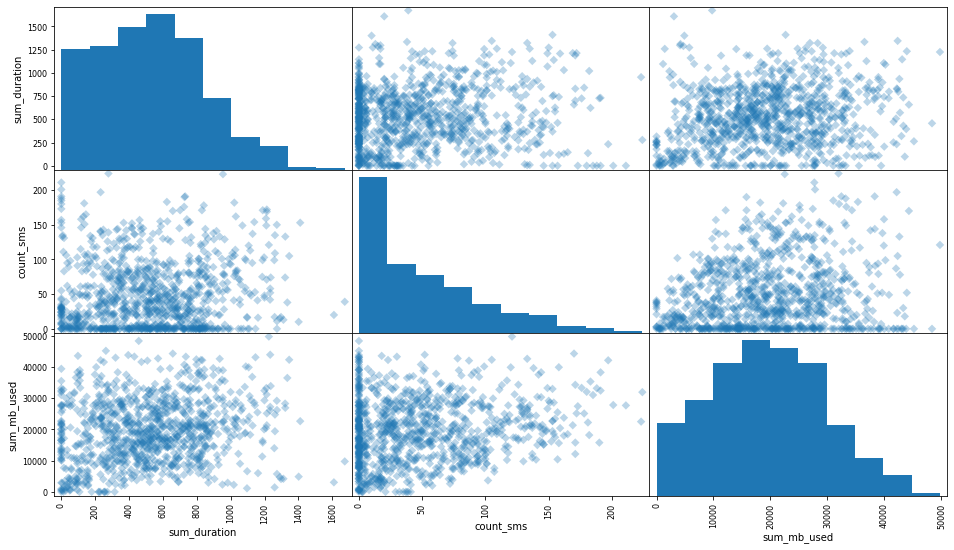

In [61]:
pd.plotting.scatter_matrix(data_ultra_stat, figsize=(16, 9),alpha=0.3, marker="D") 

Посмотрим на выбросы в начениях по boxplot-ам.

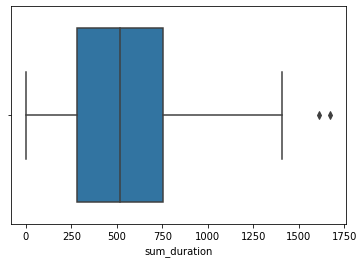

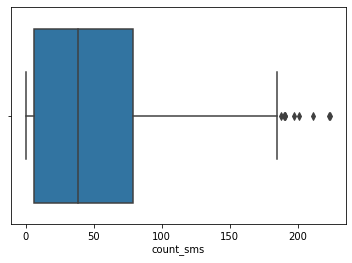

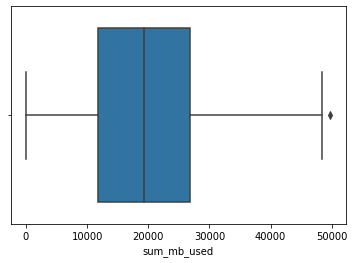

In [62]:
param = ['sum_duration', 'count_sms', 'sum_mb_used']
for par in param:
    ax = sns.boxplot(x=data_ultra_stat[par])
    plt.show()

Выбросы есть в значениях sum_duration, count_sms. На графике sum_mb_used выбросов не видно. Однако устраним выбросы по всем столбцам пользуяюсь правилом, что выбросы находятся вне интервала (Q1-1,5*IQR:Q3+1.5*IQR).

,sum_duration,count_sms,sum_mb_used
sum_duration,1.000000,0.083660,0.180431
count_sms,0.083660,1.000000,0.175307
sum_mb_used,0.180431,0.175307,1.000000


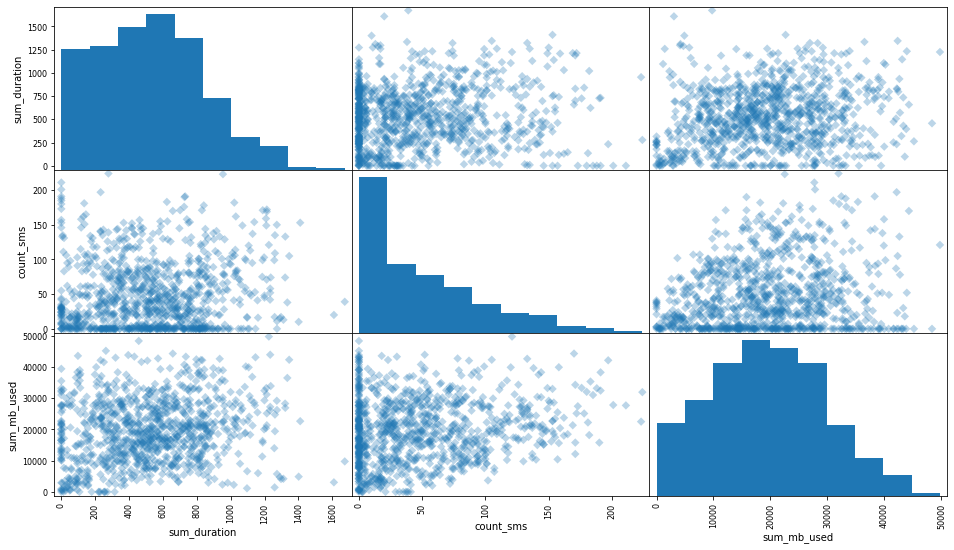

In [63]:
param = ['sum_duration', 'count_sms', 'sum_mb_used']
for par in param:
    Q1 = data_ultra_stat[par].quantile(0.25)
    Q3 = data_ultra_stat[par].quantile(0.75)
    IQR = Q3 - Q1
    data_ultra_stat = data_ultra_stat.loc[((data_ultra_stat[par]>=(Q1-1.5*IQR)) 
                                                       | (data_ultra_stat[par]<=(Q3+1.5*IQR)))]
    
pd.plotting.scatter_matrix(data_ultra_stat, figsize=(16, 9),alpha=0.3, marker="D") 
df_stat = data_ultra_stat[['sum_duration', 'count_sms', 'sum_mb_used']]
df_stat.corr()

**Выводы по распределениям параметров в тарифе Ultra:**
<br>**Распределение длительности звонков** близко к нормальному с небольшим смещением. Большая часть значени лежит в интервале 220-800 мин. Среднне 512 мин. При этом стандартное отклонение 293 мин. При этом включены в тариф 3000 мин.
<br>**Распределение отправленных сообщений** имеет большой пик в интервале до 10 смс.Около 290 пользователей отправляют такое кол-в сообщений. Согласно вычислениям, 49 сообщения - это среднее кол-во для тарифа Smart. Стандартное отклонение при этом составляет 47 сообщений. При этом включены в тариф 1000 смс.
<br>**Распределение интернет трафика** стремится к нормальному. Пиковые значения лежат в интервале 8 -30 Гб.Среднее около 19 Гб, стандартное отклонение 10211 Мб(около 10 Гб). При этом включены в тариф 30 Гб интернет-трафика.

## Проверка гипотез

### Гипотеза: средняя выручка пользователей тарифов Ultra и Smart различаются

Нулевой гипотезой станет Н0: средняя выручка пользователей тарифов Ultra и Smart одинаковая. Тогда альтернативная гипотеза Н1: средняя выручка пользователей тарифов Ultra и Smart различается.

Будем работать с выборками data_pivot_total_ultra и data_pivot_total_smart.

Проверим гипотезы о равенстве средней выручки тарифов Smart и Ultra по взятым из них выборкам методом: scipy.stats.ttest_ind, equal_var будет = False, Так как выборки разного размера.

In [64]:
alpha = .01
results = st.ttest_ind(
    data_pivot_total_ultra['profit'], 
    data_pivot_total_smart['profit'],equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


**Вывод**
<br> По полученному р-значению мы отвергаем Н0. Получается, что альтернативную Н1 о том, что средняя выручка пользователей тарифов Ultra и Smart различается не отвергается. 

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевой гипотезой станет Н0: средняя выручка пользователей из Москвы равна выручки пользователей из других регионов. Тогда альтернативная гипотеза Н1: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

Объединим данные по 2м тарифам в одну выборку. Сверим, что данные не утеряны по кол-ву строк в выборках по тарифам.

In [65]:
data_total = data_pivot_total_ultra.merge(data_pivot_total_smart,how='outer')

In [66]:
print(f'Кол-во строк в выборках по тарифам Smart + Ultra: {len(data_pivot_total_ultra)+len(data_pivot_total_smart)}')
print(f'Кол-во строк в итоговой выборке: {len(data_total)}')

Кол-во строк в выборках по тарифам Smart + Ultra: 3216
Кол-во строк в итоговой выборке: 3216


Все хорошо.

In [67]:
data_total.head()

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb,profit
0,1000,ultra,Краснодар,2253.49,22.0,159.0,22.0,0.0,0.0,0.0,0.0,1950.0
1,1000,ultra,Краснодар,23233.77,43.0,172.0,60.0,0.0,0.0,0.0,0.0,1950.0
2,1000,ultra,Краснодар,14003.64,47.0,340.0,75.0,0.0,0.0,0.0,0.0,1950.0
3,1000,ultra,Краснодар,14055.93,52.0,408.0,81.0,0.0,0.0,0.0,0.0,1950.0
4,1000,ultra,Краснодар,14568.91,58.0,466.0,57.0,0.0,0.0,0.0,0.0,1950.0


Сделаем срезы по Москве и по другим городам.

In [68]:
data_moscow = data_total.query('city=="Москва"')
data_moscow

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb,profit
8,1003,ultra,Москва,8565.21,55.0,380.0,37.0,0.00,0.0,0.0,0.0,1950.0
9,1003,ultra,Москва,12468.87,134.0,961.0,91.0,0.00,0.0,0.0,0.0,1950.0
10,1003,ultra,Москва,14768.14,108.0,855.0,83.0,0.00,0.0,0.0,0.0,1950.0
11,1003,ultra,Москва,11356.89,115.0,824.0,94.0,0.00,0.0,0.0,0.0,1950.0
12,1003,ultra,Москва,10121.53,108.0,802.0,75.0,0.00,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3176,1490,smart,Москва,17275.37,45.0,346.0,50.0,1915.37,0.0,0.0,2.0,950.0
3177,1490,smart,Москва,14816.95,44.0,322.0,48.0,0.00,0.0,0.0,0.0,550.0
3178,1490,smart,Москва,20664.97,42.0,312.0,45.0,5304.97,0.0,0.0,6.0,1750.0
3179,1490,smart,Москва,18712.66,38.0,282.0,47.0,3352.66,0.0,0.0,4.0,1350.0


In [69]:
data_other = data_total.query('city!="Москва"')
data_other

,user_id,tariff,city,sum_mb_used,count_calls,sum_duration,count_sms,extra_mb,extra_sms,extra_calls,extra_gb,profit
0,1000,ultra,Краснодар,2253.49,22.0,159.0,22.0,0.00,0.0,0.0,0.0,1950.0
1,1000,ultra,Краснодар,23233.77,43.0,172.0,60.0,0.00,0.0,0.0,0.0,1950.0
2,1000,ultra,Краснодар,14003.64,47.0,340.0,75.0,0.00,0.0,0.0,0.0,1950.0
3,1000,ultra,Краснодар,14055.93,52.0,408.0,81.0,0.00,0.0,0.0,0.0,1950.0
4,1000,ultra,Краснодар,14568.91,58.0,466.0,57.0,0.00,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,smart,Владикавказ,20579.36,41.0,247.0,42.0,5219.36,0.0,0.0,6.0,1750.0
3212,1499,smart,Пермь,1845.75,9.0,70.0,11.0,0.00,0.0,0.0,0.0,550.0
3213,1499,smart,Пермь,17788.51,68.0,449.0,48.0,2428.51,0.0,0.0,3.0,1150.0
3214,1499,smart,Пермь,17963.31,74.0,612.0,59.0,2603.31,9.0,112.0,3.0,1513.0


Сформируем выборку по Москве и по другим городам. 

Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
методом: scipy.stats.ttest_ind, equal_var будет = False, Так как выборки разного размера.

In [70]:
alpha = .01
results = st.ttest_ind(
    data_moscow['profit'], 
    data_other['profit'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


**Вывод**
<br> По полученному р-значению мы не можем отвергнуть Н0. Получается, что средняя выручка пользователей из Москвы может быть равна выручке пользователей из других регионов. 

Найдем медианы значений по этим выборкам. 

In [71]:
data_moscow['profit'].median()

1750.0

In [72]:
data_other['profit'].median()

1583.0

Они действительно достаточно близки.

## Общий вывод

Общий вывод:
<br>Для анализа тарифов сотового оператора "Мегалайн" мы исследовали 2 выборки по тарифам Smart и Ultra.
<br>В данных были обнаружены ошибки формата в столбцах с датами.
<br>Данные были проверены на пропуски и дубликаты. Исследованы на аномалии.
<br>Провели расчеты отдельно по каждому тарифу: кол-во звонков и минут по месяцам. Рассчитали кол-во отправленных сообщений.А также объем интернет-трафика. 
<br>По полученным данным рассчитали выручку от клиентов по каждому тарифу.
<br>Исследовали данные на выбросы. Устранили их. 
<br>Посмотрели корреляцию значений. Построили гистограммы.
<br>Проверили первую гипотезу:средняя выручка пользователей тарифов Ultra и Smart различаются,средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
<br>Получилось так:
<br>1. В среднем пользователи Smart платят 1161 руб, против 2072 у пользователей Ultra. Если сравнивать по макимуму, он также относится к тарифу Ultra.А медианы оплат отличаются более чем в 2 раза. 950 руб у тарифа Smart, против 1950 у тарифа Ultra. 
<br>2. По длительности разговоров пользователи тарифа Smart в среднем в месяц тратят 395 мин против 512 тарифа Ultra. 
<br>3. По сообщениям пользователи тарифов примерно равны 33 - Smart и 49 - Ultra. Интернет-трафик Ultra значительно выше 19340 мб против 16195 мб.
<br>4. Получается, что "Мегалайн" значительно больше зарабатывает на пользователях тариффа Ultra.
<br>5.Сформулированая нулевае гипотеза о равенстве выручки по пользователям Москвы и других городов не может быть отброшена. Тогда как средняя выручка пользователей тарифов Ultra и Smart различаются.
<br>6. Таким образом тариф Ultra прибыльнее Smart. На его рекламу лучше направить основной поток финансирования. Раздялять регионально клиентов смысла не имеет, ведь средняя выручка и там и там примерно равна.